In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
train = pd.read_csv('Train_data.csv')
print(train.head)
train.describe()
train.columns

<bound method NDFrame.head of        duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp  ftp_data    SF        491          0     0   
1             0           udp     other    SF        146          0     0   
2             0           tcp   private    S0          0          0     0   
3             0           tcp      http    SF        232       8153     0   
4             0           tcp      http    SF        199        420     0   
...         ...           ...       ...   ...        ...        ...   ...   
25187         0           tcp      exec  RSTO          0          0     0   
25188         0           tcp  ftp_data    SF        334          0     0   
25189         0           tcp   private   REJ          0          0     0   
25190         0           tcp      nnsp    S0          0          0     0   
25191         0           tcp    finger    S0          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [29]:
row, col =  train.shape
print(row,col)

25192 42


In [30]:
for i in range(1,4):
    L=train.iloc[:,i].unique().tolist()
    print(L)
    for j in range(row):
        train.iloc[j,i]=L.index(train.iloc[j,i])


['tcp', 'udp', 'icmp']
['ftp_data', 'other', 'private', 'http', 'remote_job', 'name', 'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u', 'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp', 'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap', 'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois', 'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login', 'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u', 'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell', 'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i', 'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i', 'http_8001']
['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3', 'S2', 'OTH']


In [23]:
print(train.head)

<bound method NDFrame.head of        duration protocol_type service flag  src_bytes  dst_bytes  land  \
0             0             0       0    0        491          0     0   
1             0             1       1    0        146          0     0   
2             0             0       2    1          0          0     0   
3             0             0       3    0        232       8153     0   
4             0             0       3    0        199        420     0   
...         ...           ...     ...  ...        ...        ...   ...   
25187         0             0      43    5          0          0     0   
25188         0             0       0    0        334          0     0   
25189         0             0       2    2          0          0     0   
25190         0             0      54    1          0          0     0   
25191         0             0      10    1          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                 

In [31]:
X_train = train.drop(['class'],axis=1)
Y_train = train['class']
print(Y_train)

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
25187    anomaly
25188    anomaly
25189    anomaly
25190    anomaly
25191    anomaly
Name: class, Length: 25192, dtype: object


/home/iteradmin/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

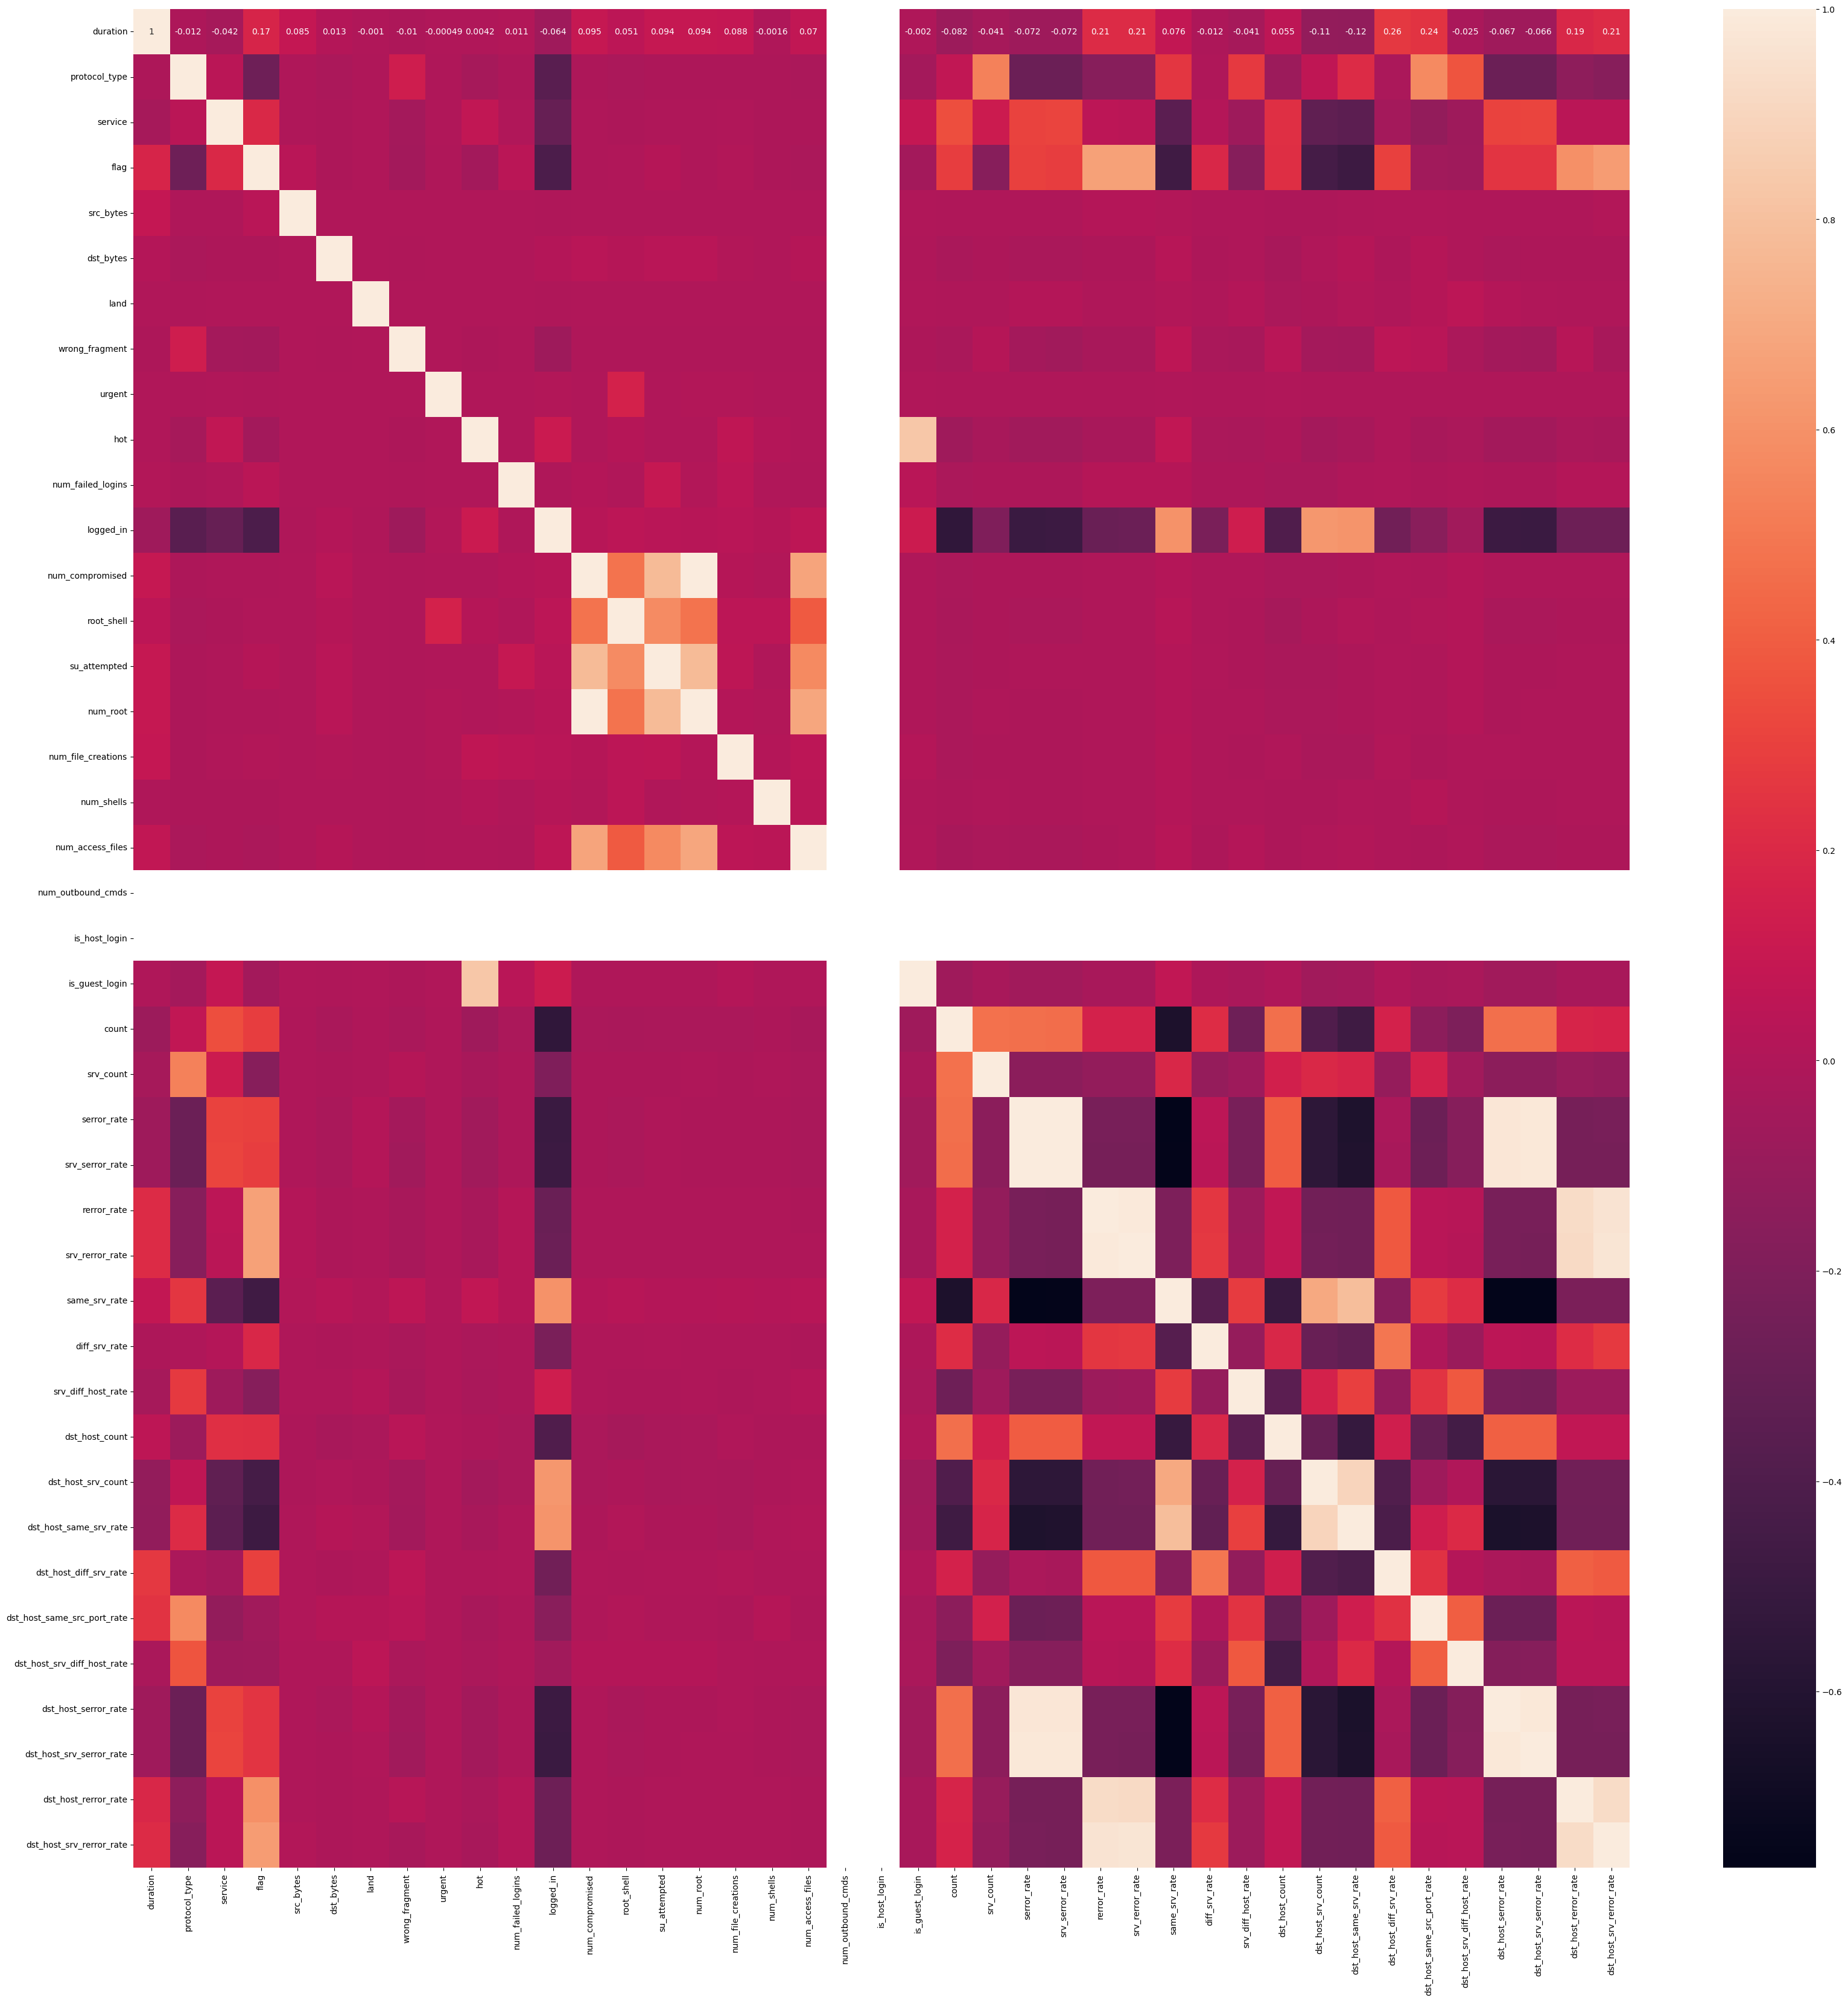

In [32]:
plt.figure(figsize=(40,40))
sns.heatmap(X_train.corr(), annot=True)

<Axes: xlabel='class', ylabel='count'>

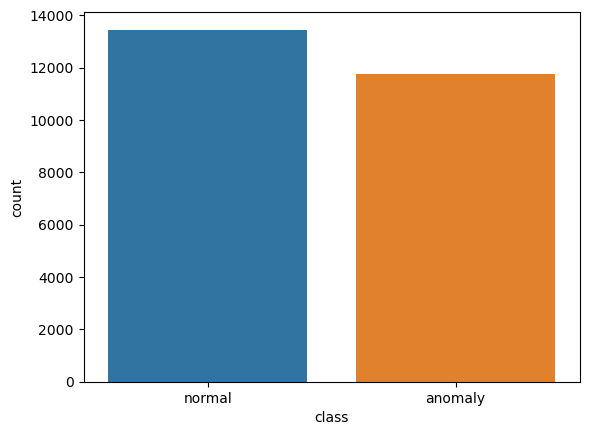

In [35]:
sns.countplot(x = Y_train)

[Text(0.6592619417750142, 0.96875, 'src_bytes <= 28.5\ngini = 0.498\nsamples = 25192\nvalue = [11743, 13449]'),
 Text(0.4730073487846241, 0.90625, 'dst_host_srv_count <= 208.5\ngini = 0.147\nsamples = 11644\nvalue = [10712, 932]'),
 Text(0.38976823063877897, 0.84375, 'dst_bytes <= 2.5\ngini = 0.092\nsamples = 11157\nvalue = [10615, 542]'),
 Text(0.28886376483889203, 0.78125, 'logged_in <= 0.5\ngini = 0.066\nsamples = 10943\nvalue = [10572, 371]'),
 Text(0.2430751837196156, 0.71875, 'dst_host_same_srv_rate <= 0.315\ngini = 0.054\nsamples = 10872\nvalue = [10568, 304]'),
 Text(0.178631995477671, 0.65625, 'src_bytes <= 5.5\ngini = 0.013\nsamples = 9718\nvalue = [9655, 63]'),
 Text(0.14471452798191067, 0.59375, 'flag <= 5.5\ngini = 0.007\nsamples = 9549\nvalue = [9516, 33]'),
 Text(0.12210288298473713, 0.53125, 'service <= 62.5\ngini = 0.005\nsamples = 9518\nvalue = [9492, 26]'),
 Text(0.1040135669869983, 0.46875, 'dst_host_srv_count <= 0.5\ngini = 0.005\nsamples = 9511\nvalue = [9488, 23]

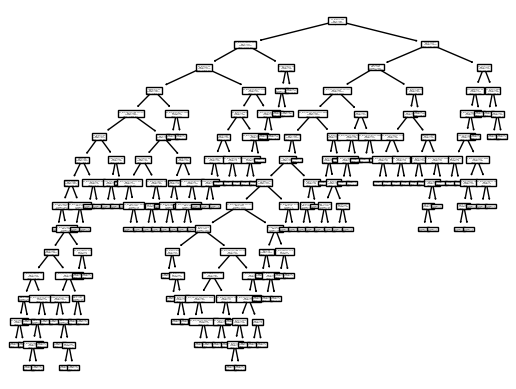

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)
tree.plot_tree(dtree, feature_names=X_train.columns) 

In [40]:
dt_train, dt_test = dtree.score(X_train, Y_train), dtree.score(X_test, Y_test)
print("Train score: {dt_train}")
print("Train score: {dt_test}")

NameError: name 'X_test' is not defined